# MNIST CNN
## Following and building upon tutorial: https://keras.io/examples/vision/mnist_convnet/

- <b>1. Import Libraries
- <b>2. Import Data
- <b>3. Process Data</b>
    - 3.1 Normalise Data
    - 3.2 Explore Data
    - 3.3 Encode Target Variable
- <b>4. Build Model
- <b>5. Train Model
- <b>6. Evaluate Model </b>
    - 6.1 Confusion Matrix
    - 6.2 ROC

## 1. Import Libraries

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import Data

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()  # Import data

11501568/11490434 [==============================] - 0s 0us/step


## 3. Process Data

### 3.1 Normalise Data

In [ ]:
X_train = X_train.astype("float32")/255   # Scale image values between 0 and 1
X_test = X_test.astype("float32")/255   # Scale image values between 0 and 1

In [ ]:
X_train = np.expand_dims(X_train, -1)  # Make sure images have shape (28, 28, 1)
X_test = np.expand_dims(X_test, -1)  # Make sure images have shape (28, 28, 1)

### 3.2 Explore Data

In [ ]:
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 3.3 Encode Target Variable

In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4. Build Model

In [ ]:
inputshape = (28,28,1)
model = keras.Sequential(
        [keras.Input(shape = inputshape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## 5. Train Model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 10ms/step - loss: 0.3596 - accuracy: 0.8911 - val_loss: 0.0791 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.1121 - accuracy: 0.9649 - val_loss: 0.0547 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0852 - accuracy: 0.9736 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0742 - accuracy: 0.9772 - val_loss: 0.0420 - val_accuracy: 0.9887
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0331 - val_accuracy: 0.9920
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.0338 - val_accuracy: 0.9905
Epo

## 6. Evaluate Model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)    # verbose (0, 1 or 2) changes training display

313/313 [==============================] - 1s 4ms/step - loss: 0.0237 - accuracy: 0.9923


In [ ]:
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023713985458016396
Test accuracy: 0.9922999739646912


### 6.1 Confusion Matrix
#### Confusion matrices can aid in identifying classification model weaknesses

In [ ]:
predictions = model.predict(X_test, verbose=1)  # Get predictions

313/313 [==============================] - 1s 2ms/step


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)   # Convert into classes labels (i.e. 1/2/3...)
y_test_classes = np.argmax(y_test, axis=1)   # Convert into classes labels (i.e. 1/2/3...)

In [ ]:
confusion = confusion_matrix(y_test_classes, predicted_classes)    # Create confusion matrix

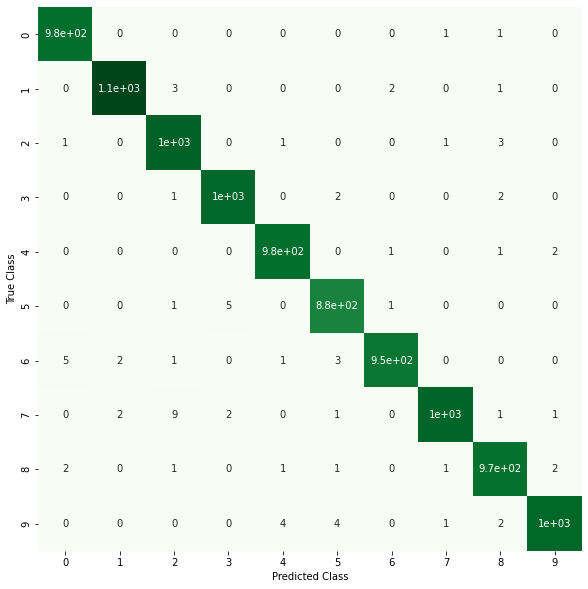

In [ ]:
# Plot confusion matrix
fig = plt.figure(figsize=(10,10))

sns.heatmap(confusion,annot=True,cbar=False,square=True,cmap=plt.cm.Greens)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

<i> Confusion matrix shows that numbers that get confused the most are [2,7] and [4,9], closely followed by [0,6] and [3,5]. Althought there are very few cases where this occurs, the ability to differentiate between these pairs of numbers should be enhanced to increase models performance.</i>

### 6.2 ROC (Receiver Operating Characteristic)
#### We can us a 'OneVsAll' method to analyse multi-classification models performance

In [ ]:
# Create a ROC graph and calcualte AUC
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, predictions, multi_class='ovr')

print(auc_score)

0.999965174584578


In [ ]:
# Questions. Why use ROC/AUC?
# Should I used PR graph instead?